In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#read all the words
words = open("names.txt", "r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [62]:
# build the dataset

def build_dataset(words):
    block_size = 3 # context length: how many characters do we take to predict the next one?
    X, Y = [], []
    for w in words:
      
      #print(w)
      context = [0] * block_size
      for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random 
random.seed(42)
random.shuffle(words)

n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [7]:
C = torch.rand((27, 2))

In [8]:
C[5]

tensor([0.4589, 0.4954])

In [9]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.4589, 0.4954])

In [10]:
C[X].shape

torch.Size([32, 3, 2])

In [11]:
X[13,2]

tensor(1)

In [12]:
  C[X][13,2]

tensor([0.6268, 0.3961])

In [13]:
C[1]

tensor([0.6268, 0.3961])

In [14]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [15]:
W1 = torch.rand((6, 100))
b1 = torch.rand(100)

In [16]:
torch.cat([emb[:, 0, :], emb[:, 0, :], emb[:, 0, :]], 1).shape

torch.Size([32, 6])

In [17]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [18]:
emb.shape

torch.Size([32, 3, 2])

In [19]:
emb.view(32, 6)

tensor([[0.1730, 0.7028, 0.1730, 0.7028, 0.1730, 0.7028],
        [0.1730, 0.7028, 0.1730, 0.7028, 0.4589, 0.4954],
        [0.1730, 0.7028, 0.4589, 0.4954, 0.3719, 0.1507],
        [0.4589, 0.4954, 0.3719, 0.1507, 0.3719, 0.1507],
        [0.3719, 0.1507, 0.3719, 0.1507, 0.6268, 0.3961],
        [0.1730, 0.7028, 0.1730, 0.7028, 0.1730, 0.7028],
        [0.1730, 0.7028, 0.1730, 0.7028, 0.1566, 0.5631],
        [0.1730, 0.7028, 0.1566, 0.5631, 0.8319, 0.3876],
        [0.1566, 0.5631, 0.8319, 0.3876, 0.9549, 0.3676],
        [0.8319, 0.3876, 0.9549, 0.3676, 0.5183, 0.6070],
        [0.9549, 0.3676, 0.5183, 0.6070, 0.9549, 0.3676],
        [0.5183, 0.6070, 0.9549, 0.3676, 0.6268, 0.3961],
        [0.1730, 0.7028, 0.1730, 0.7028, 0.1730, 0.7028],
        [0.1730, 0.7028, 0.1730, 0.7028, 0.6268, 0.3961],
        [0.1730, 0.7028, 0.6268, 0.3961, 0.5183, 0.6070],
        [0.6268, 0.3961, 0.5183, 0.6070, 0.6268, 0.3961],
        [0.1730, 0.7028, 0.1730, 0.7028, 0.1730, 0.7028],
        [0.173

In [20]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [21]:
h

tensor([[0.9809, 0.8749, 0.9444,  ..., 0.9271, 0.9911, 0.9573],
        [0.9785, 0.8917, 0.9599,  ..., 0.9545, 0.9923, 0.9709],
        [0.9724, 0.8429, 0.9557,  ..., 0.9496, 0.9844, 0.9587],
        ...,
        [0.9600, 0.9456, 0.9662,  ..., 0.9755, 0.9933, 0.9796],
        [0.9817, 0.9827, 0.9766,  ..., 0.9623, 0.9975, 0.9913],
        [0.9926, 0.9783, 0.9721,  ..., 0.9312, 0.9977, 0.9910]])

In [22]:
h.shape

torch.Size([32, 100])

In [23]:
W2 = torch.rand((100, 27))
b2 = torch.rand(27)

In [24]:
logits = h @ W2 + b2

In [25]:
logits.shape

torch.Size([32, 27])

In [26]:
counts = logits.exp()

In [27]:
prob = counts / counts.sum(1, keepdims=True)

In [28]:
prob.shape

torch.Size([32, 27])

In [29]:
prob[0].sum()

tensor(1.0000)

In [30]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [31]:
prob[torch.arange(32), Y].shape

torch.Size([32])

In [32]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(5.4556)

In [33]:
#----------- more clear everything in here ---------

In [63]:
Xtr.shape, Ytr.shape # datasets

(torch.Size([182625, 3]), torch.Size([182625]))

In [123]:
g = torch.Generator().manual_seed(2147482647)
C = torch.rand((27, 10), generator=g)
W1 = torch.rand((30, 500), generator=g)
b1 = torch.rand(500, generator=g)
W2 = torch.rand((500, 27), generator=g)
b2 = torch.rand(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [124]:
sum(p.nelement() for p in parameters) # number of parameters total

29297

In [ ]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
loss = -prob[torch.arange(32), Y].log().mean()
loss

In [ ]:
F.cross_entropy(logits, Y)
# loss için yukarıdaki adımları yaparken pytorch yeni tensorler yaratır ve memoryden yer onun yerine cross entropy çok da efficient

In [125]:
for p in parameters:
    p.requires_grad = True

In [67]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [126]:
lri = []
lossi = []
stepi = []

In [145]:

for i in range(200000):

    # minibatches
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 2) ----> (32, 3, 10)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    #lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track
    #lri.append(lr)
    stepi.append(i)
    lossi.append(loss.log10().item())



In [146]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0178, grad_fn=<NllLossBackward0>)

In [147]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1032, grad_fn=<NllLossBackward0>)

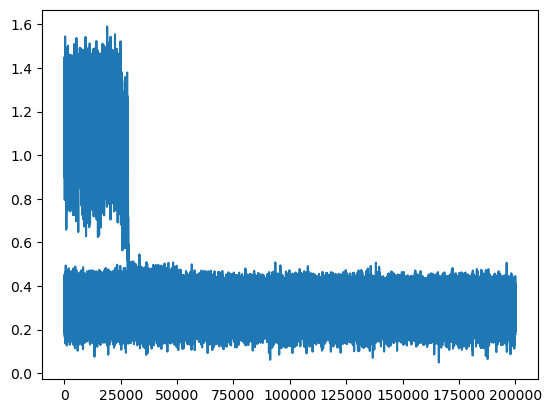

In [148]:
plt.plot(stepi, lossi)

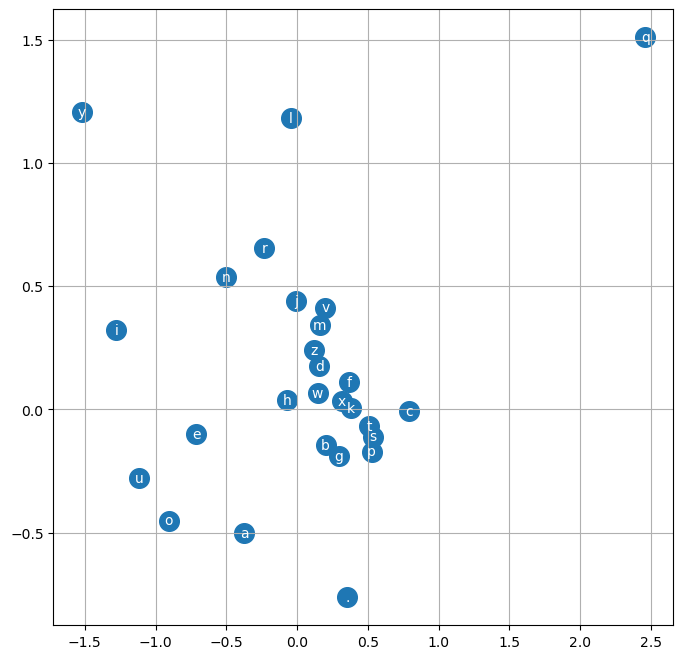

In [82]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

# word embeddings locations says that near words can be use interchangebly

In [149]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

montaymeaz.
seel.
ndhry.
larethretteg.
leg.
azelynnelin.
shi.
jenne.
elionna.
arleiyah.
houra.
noshubrighairiel.
kin.
renleilanie.
cayu.
zayven.
kylene.
els.
kayshaykolanihaan.
alynn.
